# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
data = pd.read_csv("data/Process_dataset.csv")

In [3]:
data.head(5)

,Company,TypeName,Inches,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed_GHz,Ram_GB,Total_Memory_Capacity_GB,Type,GPU_Brand,GPU_Series,GPU_model_no,OpSys,Weight_kg,Price
0,Apple,Ultrabook,13.3,1,Retina Display,0,2560,1600,Intel,Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus,640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,0,Not_given,0,1440,900,Intel,Core i5,1.8,8.0,128.0,Flash Storage,Intel,HD Graphics,6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,0,Full HD,0,1920,1080,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,Intel,HD Graphics,620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,1,Retina Display,0,2880,1800,Intel,Core i7,2.7,16.0,512.0,SSD,AMD,Radeon Pro,455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,1,Retina Display,0,2560,1600,Intel,Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus,650,macOS,1.37,96095.8080


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1273 non-null   object 
 1   TypeName                   1273 non-null   object 
 2   Inches                     1273 non-null   float64
 3   panel_type_IPS             1273 non-null   int64  
 4   DisplayType                1273 non-null   object 
 5   IsTouchscreen              1273 non-null   int64  
 6   Resolution_Width           1273 non-null   int64  
 7   Resolution_Height          1273 non-null   int64  
 8   CPU_brand                  1273 non-null   object 
 9   CPU_series_model_gen_type  1273 non-null   object 
 10  CPU_speed_GHz              1273 non-null   float64
 11  Ram_GB                     1273 non-null   float64
 12  Total_Memory_Capacity_GB   1272 non-null   float64
 13  Type                       1272 non-null   objec

# Check Null Values

In [6]:
null_rows = data[data.isnull().any(axis=1)]
print (f"Number of Rows that contain NUll Values: {null_rows.shape[0]}")
data.isnull().sum()

Number of Rows that contain NUll Values: 3


Company                      0
TypeName                     0
Inches                       0
panel_type_IPS               0
DisplayType                  0
IsTouchscreen                0
Resolution_Width             0
Resolution_Height            0
CPU_brand                    0
CPU_series_model_gen_type    0
CPU_speed_GHz                0
Ram_GB                       0
Total_Memory_Capacity_GB     1
Type                         1
GPU_Brand                    0
GPU_Series                   0
GPU_model_no                 1
OpSys                        0
Weight_kg                    1
Price                        0
dtype: int64

In [7]:

#Function To check Null Values

def null_value_checking(dataframe: pd.DataFrame, columns: list):

    null_rows = dataframe[dataframe[columns].isnull().any(axis=1)]
        
    print (f" For {columns} Total Rows that has null values: {null_rows.shape[0]}")

    return(null_rows)

In [8]:
null_value_checking(data, ["Total_Memory_Capacity_GB","Type", "Weight_kg", "GPU_model_no"])

 For ['Total_Memory_Capacity_GB', 'Type', 'Weight_kg', 'GPU_model_no'] Total Rows that has null values: 3


,Company,TypeName,Inches,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed_GHz,Ram_GB,Total_Memory_Capacity_GB,Type,GPU_Brand,GPU_Series,GPU_model_no,OpSys,Weight_kg,Price
6,Apple,Ultrabook,15.4,1,Retina Display,0,2880,1800,Intel,Core i7,2.2,16.0,256.0,Flash Storage,Intel,Iris Pro,NaN,Mac OS X,2.04,114017.6016
201,Dell,Ultrabook,13.3,0,Full HD,0,1920,1080,Intel,Core i7 8550U,1.8,8.0,256.0,SSD,Intel,HD Graphics,U 620,Windows 10,NaN,77202.7200
749,Dell,Notebook,15.6,0,Full HD,0,1920,1080,Intel,Core i7 7500U,2.7,16.0,NaN,NaN,AMD,Radeon,R7 M445,Windows 10,2.30,62938.0656


In [9]:
''' 
To Drop Null Values

# Drop only if ALL specified columns are null
df = df.dropna(subset=['Inches', 'Resolution'], how='all')

# Drop if ANY of specified columns are null
df = df.dropna(subset=['Inches', 'Resolution'], how='any')

'''

" \nTo Drop Null Values\n\n# Drop only if ALL specified columns are null\ndf = df.dropna(subset=['Inches', 'Resolution'], how='all')\n\n# Drop if ANY of specified columns are null\ndf = df.dropna(subset=['Inches', 'Resolution'], how='any')\n\n"

In [17]:
data = data.dropna(subset=["Total_Memory_Capacity_GB","Type", "Weight_kg","GPU_model_no"], how = 'any')
data_copy = data.copy()
data.isnull().sum()

Company                      0
TypeName                     0
Inches                       0
panel_type_IPS               0
DisplayType                  0
IsTouchscreen                0
Resolution_Width             0
Resolution_Height            0
CPU_brand                    0
CPU_series_model_gen_type    0
CPU_speed_GHz                0
Ram_GB                       0
Total_Memory_Capacity_GB     0
Type                         0
GPU_Brand                    0
GPU_Series                   0
GPU_model_no                 0
OpSys                        0
Weight_kg                    0
Price                        0
dtype: int64

# Dataset Without Null values

In [11]:
data.to_csv("data/without_null.csv", index=True)

# Next Time 


# Exploratory Data Analysis (EDA)

## Check Unique Values in Column

In [2]:
data = pd.read_csv("data/without_null.csv")

In [3]:
data = data.drop('Unnamed: 0', axis=1)
data

,Company,TypeName,Inches,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed_GHz,Ram_GB,Total_Memory_Capacity_GB,Type,GPU_Brand,GPU_Series,GPU_model_no,OpSys,Weight_kg,Price
0,Apple,Ultrabook,13.3,1,Retina Display,0,2560,1600,Intel,Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus,640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,0,Not_given,0,1440,900,Intel,Core i5,1.8,8.0,128.0,Flash Storage,Intel,HD Graphics,6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,0,Full HD,0,1920,1080,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,Intel,HD Graphics,620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,1,Retina Display,0,2880,1800,Intel,Core i7,2.7,16.0,512.0,SSD,AMD,Radeon Pro,455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,1,Retina Display,0,2560,1600,Intel,Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus,650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,Lenovo,2 in 1 Convertible,14.0,1,Full HD,1,1920,1080,Intel,Core i7 6500U,2.5,4.0,128.0,SSD,Intel,HD Graphics,520,Windows 10,1.80,33992.6400
1266,Lenovo,2 in 1 Convertible,13.3,1,Quad HD+,1,3200,1800,Intel,Core i7 6500U,2.5,16.0,512.0,SSD,Intel,HD Graphics,520,Windows 10,1.30,79866.7200
1267,Lenovo,Notebook,14.0,0,Not_given,0,1366,768,Intel,Celeron Dual Core N3050,1.6,2.0,64.0,Flash Storage,Intel,HD Graphics,Generic,Windows 10,1.50,12201.1200
1268,HP,Notebook,15.6,0,Not_given,0,1366,768,Intel,Core i7 6500U,2.5,6.0,1024.0,HDD,AMD,Radeon,R5 M330,Windows 10,2.19,40705.9200


In [18]:
data.nunique()

Company                       19
TypeName                       6
Inches                        24
panel_type_IPS                 2
DisplayType                    5
IsTouchscreen                  2
Resolution_Width              13
Resolution_Height             10
CPU_brand                      3
CPU_series_model_gen_type     93
CPU_speed_GHz                 25
Ram_GB                        10
Total_Memory_Capacity_GB      22
Type                           7
GPU_Brand                      4
GPU_Series                    13
GPU_model_no                  88
OpSys                          9
Weight_kg                    180
Price                        775
dtype: int64


## Identify Numerical and Categorical Column


In [4]:
numerical_cols = data.select_dtypes(include=["float64", "float", "int64", "int"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()
print (f"Total Numerical Column:{len(numerical_cols)}\n {numerical_cols} \n \n Categorical Columns \n {categorical_cols}")

Total Numerical Column:10
 ['Inches', 'panel_type_IPS', 'IsTouchscreen', 'Resolution_Width', 'Resolution_Height', 'CPU_speed_GHz', 'Ram_GB', 'Total_Memory_Capacity_GB', 'Weight_kg', 'Price'] 
 
 Categorical Columns 
 ['Company', 'TypeName', 'DisplayType', 'CPU_brand', 'CPU_series_model_gen_type', 'Type', 'GPU_Brand', 'GPU_Series', 'GPU_model_no', 'OpSys']


#### Unique Values in Categorical Column


In [19]:
def Unique_value_cat_column(data: pd.DataFrame, cat_columns: list):
    for column in cat_columns:
        
        unique_value = data[column].value_counts()

        print(f"There are {len(unique_value)} unique values in column \"{column}\"")
        print(unique_value)
        print("=============================================")

Unique_value_cat_column(data, categorical_cols)


There are 19 unique values in column "Company"
Company
Lenovo       290
Dell         285
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         20
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
There are 6 unique values in column "TypeName"
TypeName
Notebook              709
Gaming                203
Ultrabook             189
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
There are 5 unique values in column "DisplayType"
DisplayType
Full HD           822
Not_given         361
4K Ultra HD        42
Quad HD+           29
Retina Display     16
Name: count, dtype: int64
There are 3 unique values in column "CPU_brand"
CPU_brand
Intel      1207
Amd          62
Samsung       1
Name: count, dtype: int64
There are 93 unique values i

In [20]:
data.describe()

,Inches,panel_type_IPS,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_speed_GHz,Ram_GB,Total_Memory_Capacity_GB,Weight_kg,Price
count,1270.000000,1270.000000,1270.000000,1270.00000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,15.130787,0.281890,0.145669,1893.40315,1069.949606,2.299071,8.451181,622.100787,2.077473,59897.317266
std,1.955499,0.450097,0.352913,494.00320,283.998320,0.507392,5.562913,481.293224,0.808419,37342.252052
min,10.100000,0.000000,0.000000,1366.00000,768.000000,0.900000,1.000000,8.000000,0.000200,9270.720000
25%,14.000000,0.000000,0.000000,1600.00000,900.000000,2.000000,4.000000,256.000000,1.500000,31914.720000
50%,15.600000,0.000000,0.000000,1920.00000,1080.000000,2.500000,8.000000,500.000000,2.040000,52054.560000
75%,15.600000,1.000000,0.000000,1920.00000,1080.000000,2.700000,8.000000,1024.000000,2.320000,79303.816800
max,35.600000,1.000000,1.000000,3840.00000,2160.000000,3.600000,64.000000,2560.000000,11.100000,324954.720000


## Observe Relationship among others features and Price

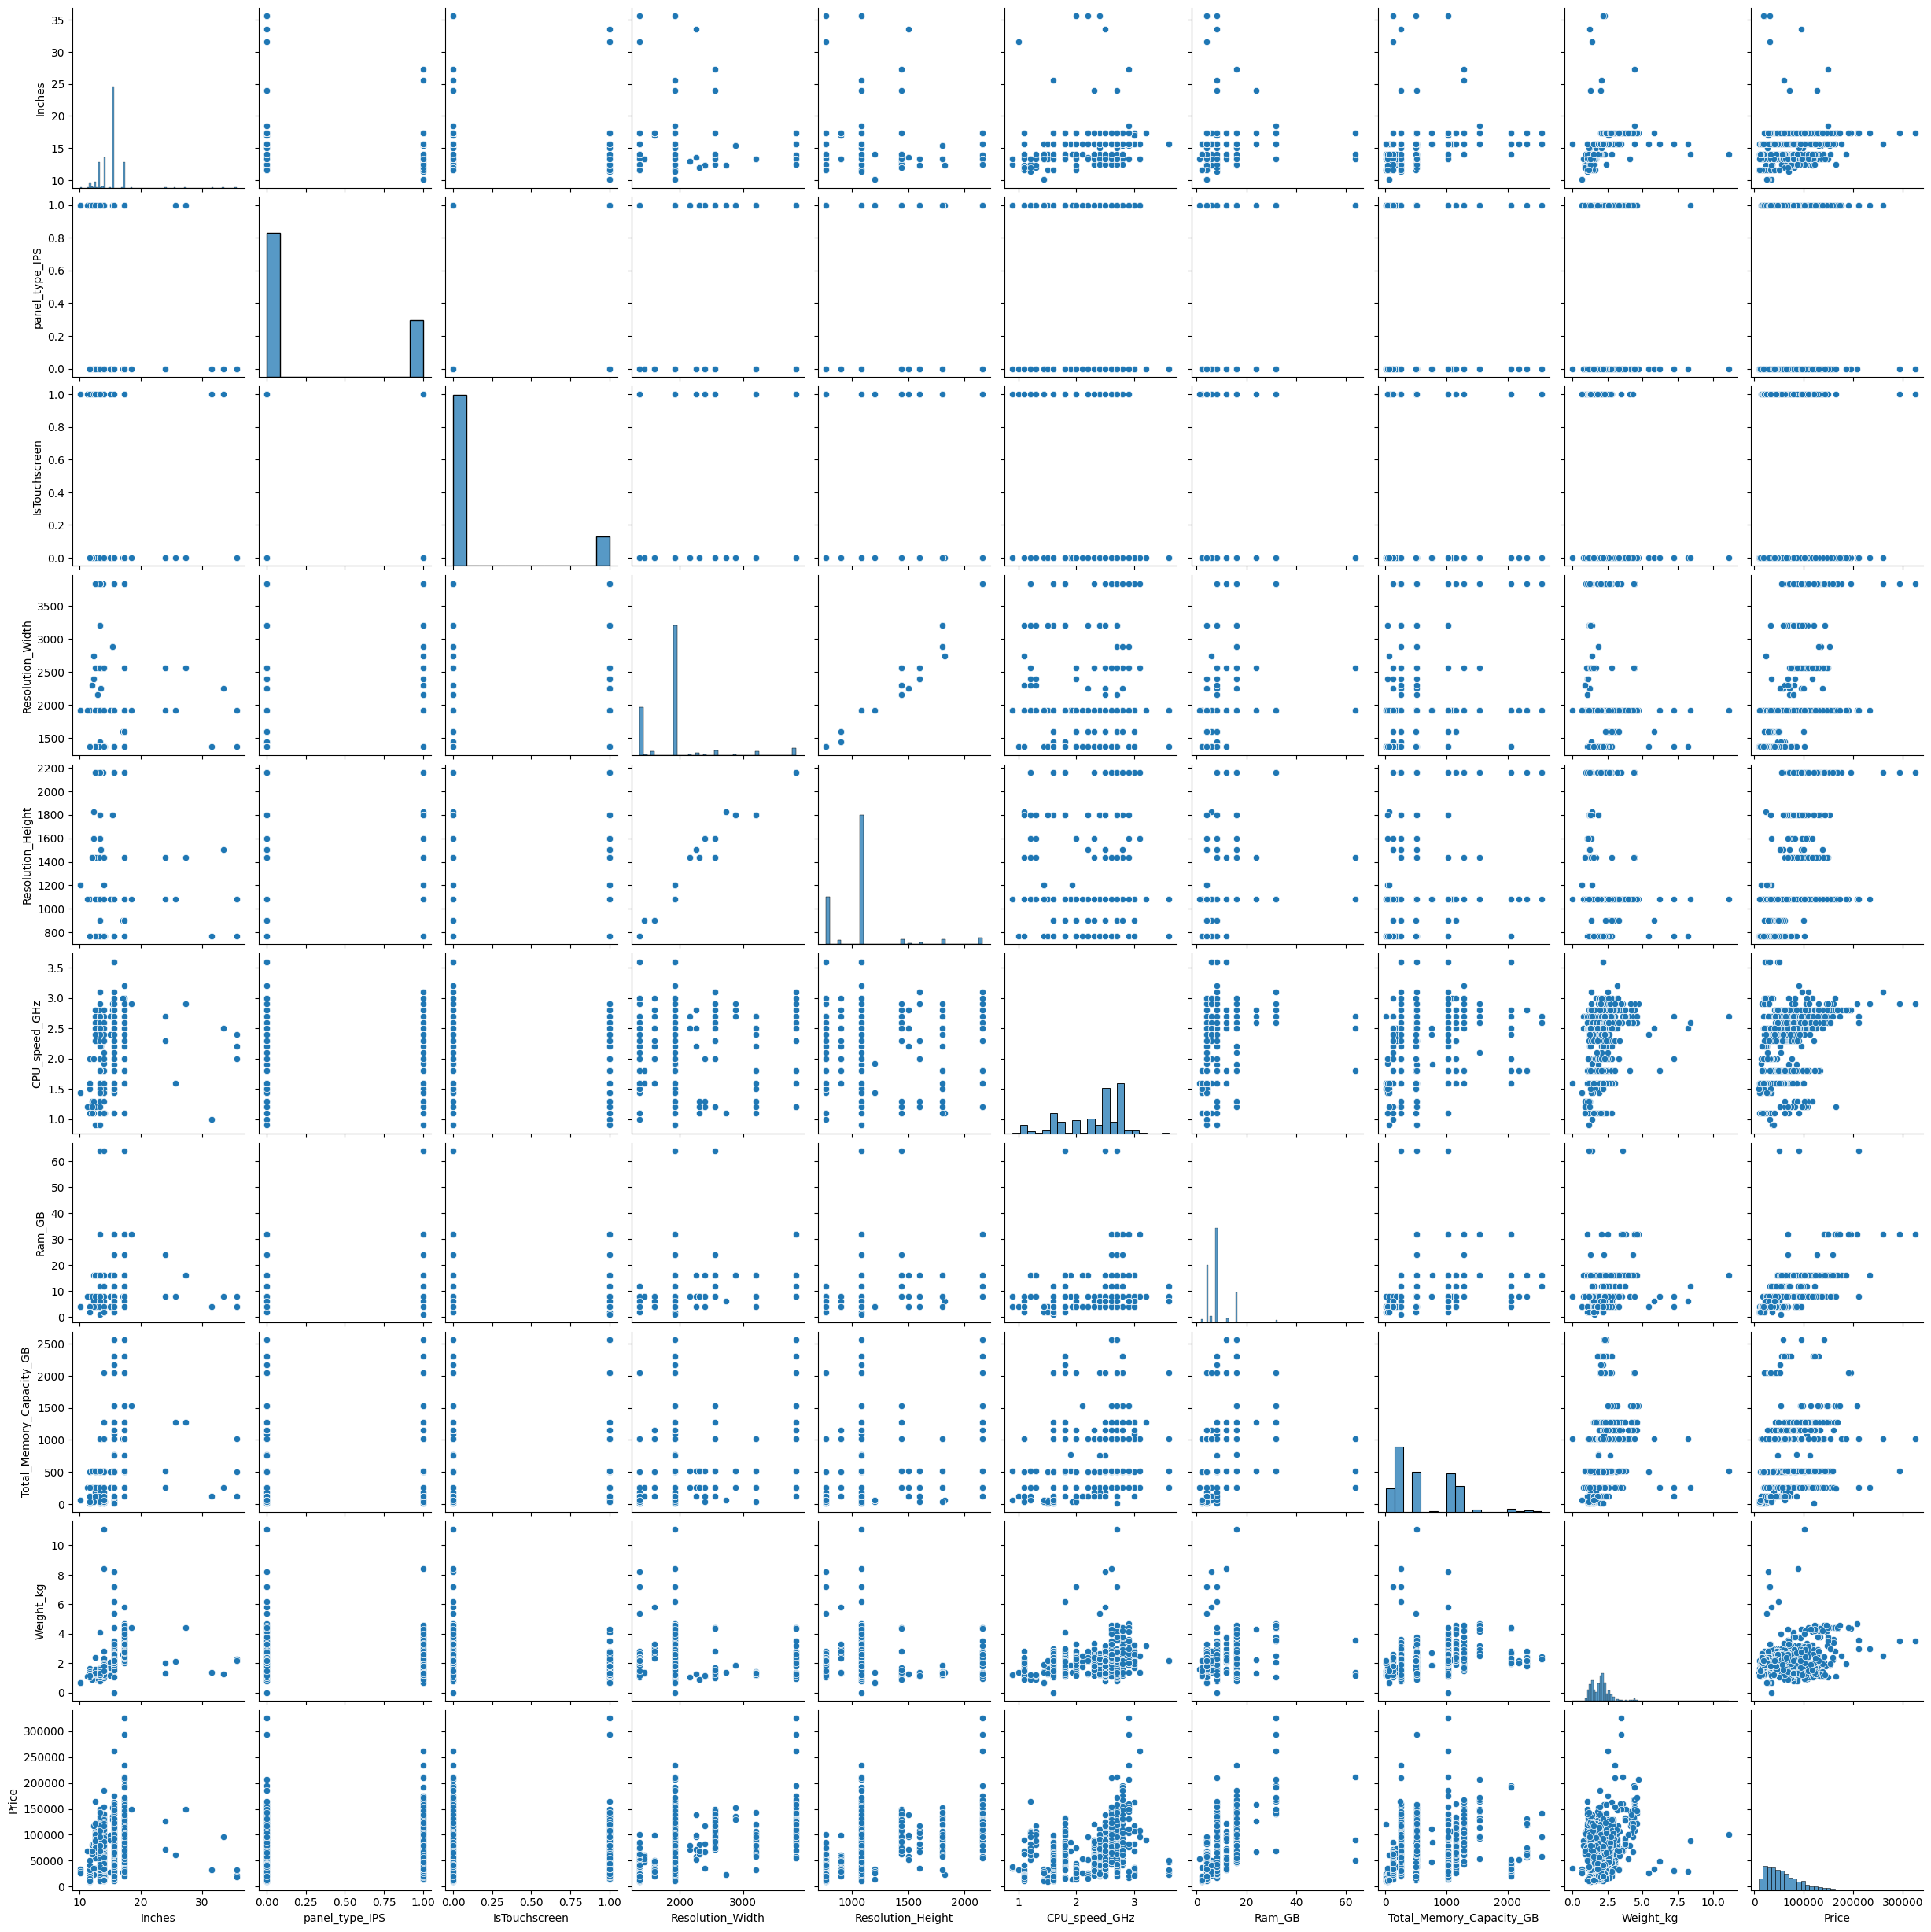

In [5]:
sns.pairplot(data)

## Exploring The PDFs

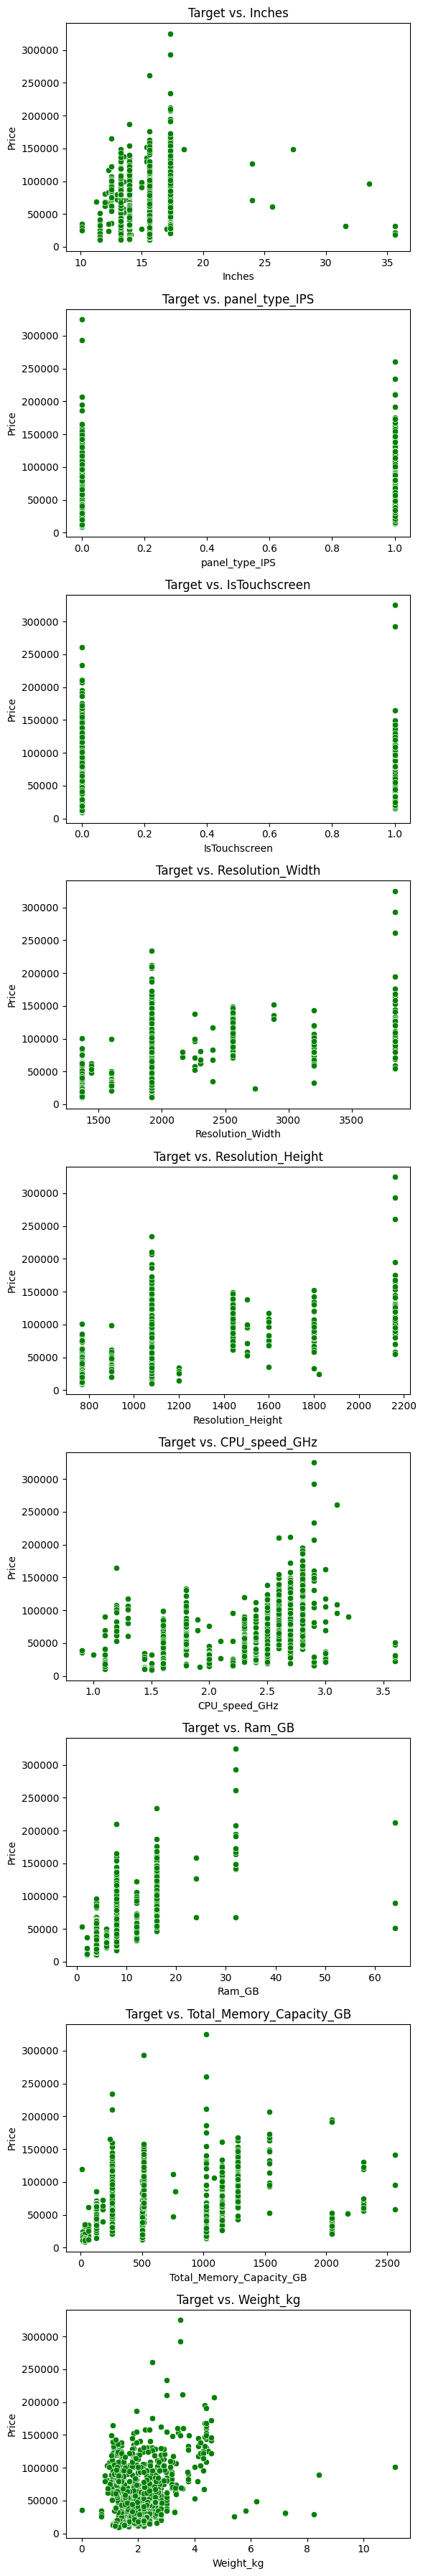

In [7]:
features = ['Inches', 'panel_type_IPS', 'IsTouchscreen', 'Resolution_Width',
                'Resolution_Height', 'CPU_speed_GHz', 'Ram_GB', 
                'Total_Memory_Capacity_GB', 'Weight_kg'] 

n_features = len(features)

fig, axes = plt.subplots(n_features, 1, figsize=(6, 4 * n_features))

for i, feature in enumerate(features):
    sns.scatterplot(
        data=data,
        x=feature,
        y='Price',
        ax=axes[i],
        color='green'
    )
    axes[i].set_title(f"Target vs. {feature}")

plt.tight_layout()
plt.show()

### Dealing with outlier 

### Price

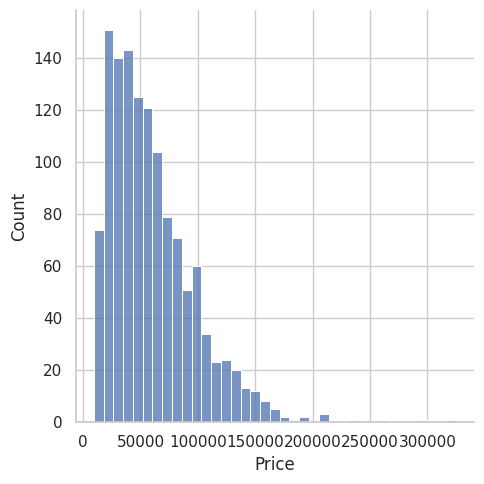

In [16]:
sns.displot(data["Price"])

#### Dealing with outlier -> drop prices below 99th percentile

Total Data after discard(1257, 20)


/tmp/ipykernel_22735/1409639301.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_discard_n["Price"])


<Axes: xlabel='Price', ylabel='Density'>

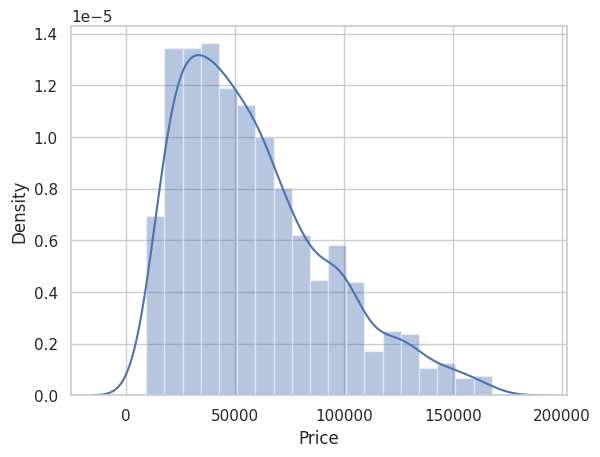

In [22]:

quanitle = data["Price"].quantile(0.99)
data_discard_n = data[data["Price"]<quanitle]
print (f'Total Data after discard{data_discard_n.shape}')
sns.distplot(data_discard_n["Price"])

## Relationship between company name and price of the laptop

In [15]:
Companis = data ["Company"].unique()
print (f"Number of company: {len(Companis)} \n {Companis}")

print ("==============================================")

print ("The relation between company name and Price (mean): \n")
companies_relation = data.groupby("Company")["Price"].mean().sort_values(ascending=False)
companies_relation

Number of company: 19 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
The relation between company name and Price (mean): 



Company
Razer        178282.491429
LG           111834.720000
MSI           91814.548891
Google        89386.080000
Microsoft     85903.788000
Apple         81806.644800
Huawei        75870.720000
Samsung       75308.320000
Toshiba       66747.370213
Dell          63189.107874
Xiaomi        60390.882000
Asus          58972.373723
Lenovo        58072.477208
HP            57214.371465
Fujitsu       38574.720000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

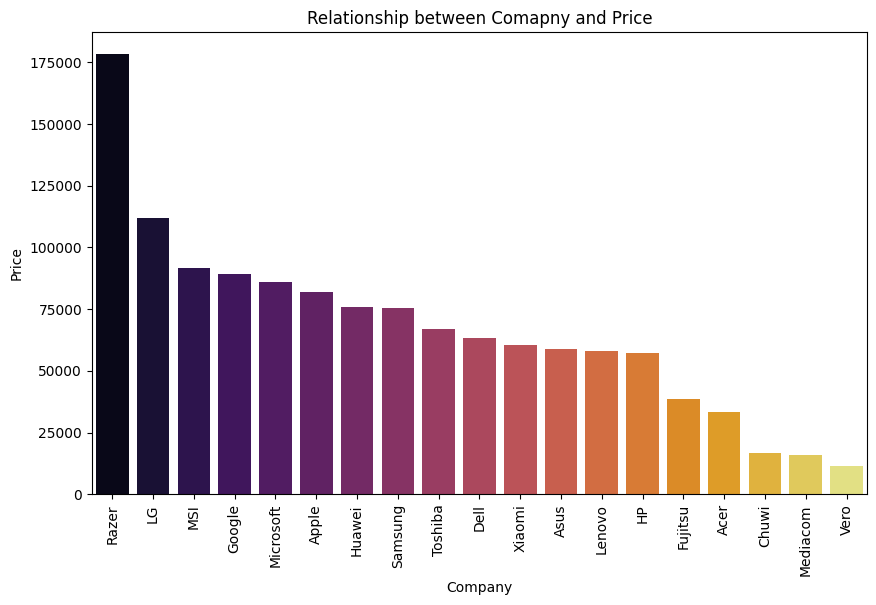

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=companies_relation.index,
    y=companies_relation.values,
    hue=companies_relation.index,  # Required for palette
    palette='inferno',
    dodge=False,  # Avoid grouped bars
    legend=False   # Hide legend if redundant
)
plt.xlabel("Company")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Relationship between Comapny and Price")
plt.show()


In [9]:
sns.set(style="whitegrid")

In [ ]:
sns.swarmplot(x="Price", y="Company", data=data)